# Problem Statement
*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*   How well those variables describe the electric cycle demands?



In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Exploratory Analysis for Idetification of Varialbles & Data Types

In [38]:
df = pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [40]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [41]:
# Checking Null Values
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


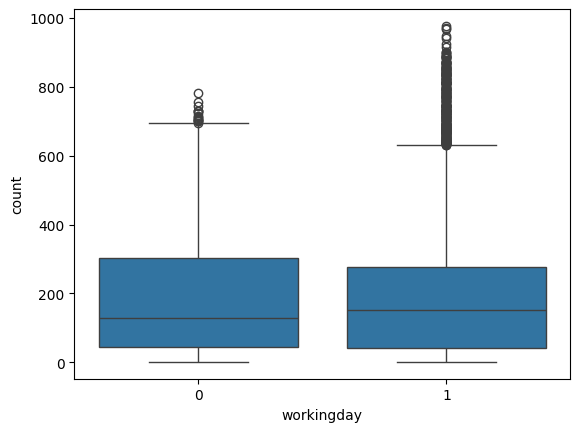

In [42]:
# Analyzing the effect of working day
sns.boxplot(data=df,x='workingday',y='count')
plt.show()


Through visual analysis, it appears that the count is not significantly influenced by working days. This needs to be verified using statistical methods.

In [43]:
# Outlier Treatment
q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr = q3-q1
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)
df = df[(df['count']>=lower_bound) & (df['count']<=upper_bound)]

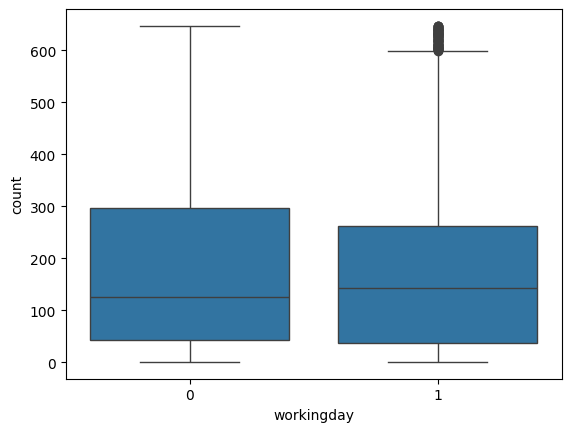

In [44]:
sns.boxplot(data=df,x='workingday',y='count')
plt.show()

# Hypothesis Testing - Work Day
**Step 1 : Defining Null and Alternate Hypothesis**
*   H0(Null Hypothesis) : Count on weekday = Count on Weekend
*   HA(Alternative Hypothesis) : Count on weekday > Count on Weekend.

**Step 2 : Selecting Appropriate test**
This is a one-tailed test comparing the means of two independent populations. Since the population standard deviations are unknown, the appropriate method for this analysis is the two-sample independent t-test.

**Step 3 : Deciding the significance level**
As given in the problem statement, we select significance level (α) = 0.05

**Step 4 : Preparing the data**


In [45]:
df['workingday'].value_counts()

,count
workingday,
1,7161
0,3425


In [46]:
weekday=df[df['workingday']==1]['count'].sample(3425)
weekend=df[df['workingday']==0]['count'].sample(3425)
print('The sample standard deviation of the count on weekday is:', round(weekday.std(),2))
print('The sample standard deviation of the count on weekend is:', round(weekend.std(),2))

The sample standard deviation of the count on weekday is: 153.06
The sample standard deviation of the count on weekend is: 164.29


As the sample standard deviations are different, the population standard deviations may be assumed to be different.

**Performing t-test to get the probability of renting bike on weekday is same as that of weekend**

In [47]:
from scipy.stats import ttest_ind
t_stat, p_value= ttest_ind(weekday, weekend, equal_var=False, alternative='greater')
# Conclusion based on p-value
if p_value < 0.05:
 print(f'Conclusion: As the p-value {round(p_value,4)} is less than the significance level, we reject the null hypothesis')
else:
 print(f'Conclusion: As the p-value {round(p_value,4)} is greater than the significance level, we fail to reject the null hypothesis')

Conclusion: As the p-value 0.9879 is greater than the significance level, we fail to reject the null hypothesis


As the p-value of 0.9908 is greater than the level of significance, the null hypothesis that the bike rental count on weekdays is less than or equals the rental count on weekends, cannot be rejected. Therefore, it is assumed that the bike rental count on weekdays is the same as the rental count on weekends.

# Is the demand of electric cycles same for different weather?

**Weather:**

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [48]:
df['weather'].value_counts()

,count
weather,
1,6965
2,2770
3,850
4,1


In [49]:
# Outlier Treatment
df = df[~(df['weather']==4)]

In [50]:
w1=df[df['weather']==1]['count'].sample(850)
w2=df[df['weather']==2]['count'].sample(850)
w3=df[df['weather']==3]['count'].sample(850)

In [51]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6965.0,187.329218,161.581066,1.0,45.0,153.0,287.0,647.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0


#Hypothesis Testing - Weather
**Step 1 : Define Null and Alternate Hypothesis**

*   H0: Bikes rented is same in all weathers
*   Ha: Bikes rented count is not same for all weathers
*   Significance level (α) = 0.05

**Step 2 : Select Appropriate Test**

This problem involves comparing three population means. A one-way ANOVA would be an appropriate test, assuming the normality and equality of variance conditions are met. To test for normality, the Shapiro-Wilk test is conducted on the response variable, while the Levene test is used to assess equality of variance.

**Shapiro-Wilk's Test : Test for Normal distribution of inputs:**

*   H0 : Count follows Normal distribution
*   Ha : Count does not follow Normal Distribution




In [52]:
from scipy.stats import shapiro
#null - series is normal
#alter- not normal
sw_stat, p_value=shapiro(df['count'].sample(5000))

print(p_value)

7.700908554993623e-49



As the p-value is less than the significance level, the null hypothesis that the count data is normally distributed is rejected.

#Levene's Test

In [53]:
from scipy.stats import levene
l_stat, p_val= levene(w1,w2,w3)
print(p_val)

3.9551997104781653e-22



The p-value is significantly low, falling below the significance level, indicating that the variances are unequal. As a result, both key assumptions for ANOVA are not met. Nevertheless, the analysis is carried out using ANOVA despite these violations.

#ANOVA

In [54]:
from scipy.stats import f_oneway
test_stat,p_val=f_oneway(w1,w2,w3)
print(p_val)

2.7112946933533537e-27


As the p_value for ANOVA is very low, we reject the null hypothesis and conclude that the weather has no effect on the business

#Is Weather Dependent on Season?

**Seasons:**

1: Spring  
2: Summer  
3: Fall  
4: Winter

<Axes: xlabel='season', ylabel='count'>

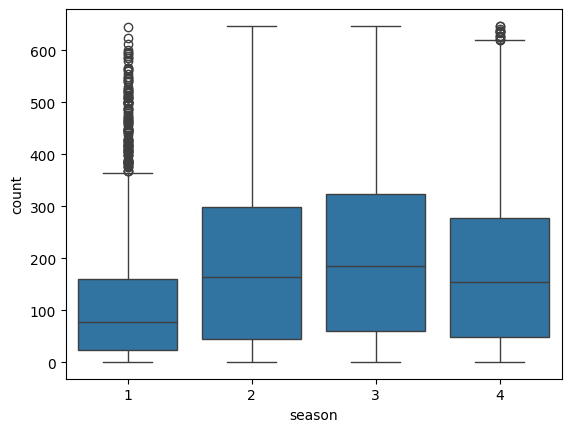

In [55]:
#Graphical Analysis - Season v/s Count
sns.boxplot(data=df,x='season',y='count')

Sales are highest in summer and fall, followed by winter season, while spring has the lowest number of rented bikes, indicating a clear seasonal pattern in bike rentals.

#Hypothesis Testing - Season
The Chi-Square test is selected to analyze the relationship between categorical variables i.e. season and weather.   

H0: No relationship between weather and season  
Ha: Weather is dependent on season  
Significance level = 0.05

In [56]:
cross_tab = pd.crosstab(index=df['season'],columns=df['weather'],values=df['count'], aggfunc='sum')
cross_tab

weather,1,2,3
season,,,
1,212386,75694,12919
2,367404,121426,26973
3,402602,120789,27883
4,322356,142237,27308


In [57]:
a, p_val, b, c = scipy.stats.chi2_contingency(cross_tab)
print(p_val)

0.0


It is observed that p_value for chi-square test is less than the significance level, 0.05. Hence, we reject the null hypothesis and deduce that weather and season are dependent.

#Business Insights Based on Visual Analysis and Hypothesis Testing
* **Impact of Workdays**: Workdays do not influence bike-sharing trends.
* **Impact of Weather**: Weather conditions affect bike sharing, with the lowest rentals observed in weather type 3.
* **Impact of Seasons**: Seasons influence bike sharing, with the lowest rentals recorded in season 1.
* **Relationship Between Weather and Seasons**: Weather and season are interdependent, with high bike rental counts observed during the combinations of weather 1 with season 2 and weather 1 with season 3.

#Recommendations for Yulu
1. Maintain equal focus on both weekdays and weekends for bike rentals.
2. Scale down operations during weather type 3.
3. Reduce operations during season 1.
4. Expand operations during the following combinations:
  * Weather 1 and season 2
  * Weather 1 and season 3